In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
#Preprocessing

from tensorflow.keras.utils import image_dataset_from_directory
train_dir = './images/images/train'
test_dir = './images/images/validation'


In [3]:
train_data = image_dataset_from_directory(train_dir,
                                          batch_size=32,
                                          shuffle=True,
                                          image_size=(224,224),                                          
                                          label_mode='categorical',
                                         )
test_data = image_dataset_from_directory(test_dir,
                                         batch_size=32,
                                         shuffle=False,                                         
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         )

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [4]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [5]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

In [6]:
data_augmentation_layer = tf.keras.models.Sequential([
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.2),
    
],name='data_augmentation_layer')

In [7]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3),name='Input_layer')
x = data_augmentation_layer(inputs)
x = base_model(x,training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(len(train_data.class_names),activation='softmax',name='output_layer')(x)
model = tf.keras.Model(inputs,outputs)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [8]:
# Setup checkpoint path
checkpoint_path = "model_face_expression/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=False, 
                                                         save_best_only=True,
                                                         monitor='val_accuracy',
                                                                                                           
                                                         verbose=1)

In [9]:
history_1 = model.fit(train_data,
epochs=5,
validation_data=test_data,
steps_per_epoch=len(train_data),
batch_size=32,
validation_steps=int(0.15*len(test_data)),
callbacks=[checkpoint_callback,create_tensorboard_callback(dir_name='tensorlogs_face_exp',experiment_name='without_fine_tuning')]
)

Saving TensorBoard log files to: tensorlogs_face_exp/without_fine_tuning/20220913-214835
Epoch 1/5
901/901 [==============================] - ETA: 0s - loss: 1.5675 - accuracy: 0.3903
Epoch 1: val_accuracy improved from -inf to 0.09659, saving model to model_face_expression/checkpoint.ckpt


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


901/901 [==============================] - 216s 235ms/step - loss: 1.5675 - accuracy: 0.3903 - val_loss: 2.1145 - val_accuracy: 0.0966
Epoch 2/5
901/901 [==============================] - ETA: 0s - loss: 1.4506 - accuracy: 0.4458
Epoch 2: val_accuracy improved from 0.09659 to 0.21307, saving model to model_face_expression/checkpoint.ckpt


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


901/901 [==============================] - 149s 165ms/step - loss: 1.4506 - accuracy: 0.4458 - val_loss: 1.8779 - val_accuracy: 0.2131
Epoch 3/5
901/901 [==============================] - ETA: 0s - loss: 1.4267 - accuracy: 0.4553
Epoch 3: val_accuracy improved from 0.21307 to 0.24621, saving model to model_face_expression/checkpoint.ckpt


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


901/901 [==============================] - 128s 142ms/step - loss: 1.4267 - accuracy: 0.4553 - val_loss: 1.7846 - val_accuracy: 0.2462
Epoch 4/5
901/901 [==============================] - ETA: 0s - loss: 1.4024 - accuracy: 0.4668
Epoch 4: val_accuracy improved from 0.24621 to 0.25947, saving model to model_face_expression/checkpoint.ckpt


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


901/901 [==============================] - 123s 136ms/step - loss: 1.4024 - accuracy: 0.4668 - val_loss: 1.8064 - val_accuracy: 0.2595
Epoch 5/5
901/901 [==============================] - ETA: 0s - loss: 1.3871 - accuracy: 0.4724
Epoch 5: val_accuracy improved from 0.25947 to 0.27367, saving model to model_face_expression/checkpoint.ckpt


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


901/901 [==============================] - 113s 126ms/step - loss: 1.3871 - accuracy: 0.4724 - val_loss: 1.8234 - val_accuracy: 0.2737


In [10]:
history_1

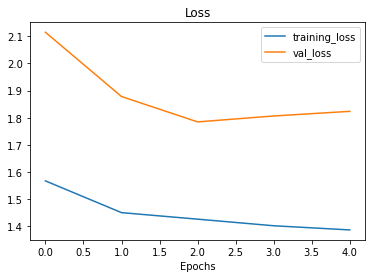

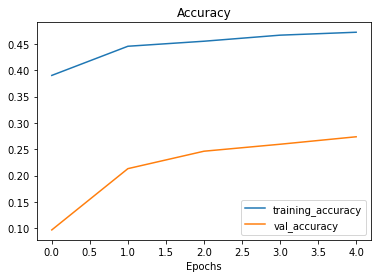

In [11]:
plot_loss_curves(history_1)

In [12]:
#Fine Tuning

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 7)                 8967      
                                                                 
Total params: 4,058,538
Trainable params: 8,967
Non-trainable

In [13]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [14]:
# fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune = model.fit( train_data,
                           epochs=10,
                           validation_data=test_data,
                           initial_epoch=history_1.epoch[-1], # start from previous last epoch
                           validation_steps=int(0.25 * len(test_data)),
                           callbacks=[checkpoint_callback,create_tensorboard_callback(dir_name='tensorlogs_face_exp',experiment_name='with_fine_tuning1')]) # name experiment appropriately

Saving TensorBoard log files to: tensorlogs_face_exp/with_fine_tuning1/20220913-220222
Epoch 5/10
901/901 [==============================] - ETA: 0s - loss: 1.3436 - accuracy: 0.4923
Epoch 5: val_accuracy improved from 0.27367 to 0.28977, saving model to model_face_expression/checkpoint.ckpt


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


901/901 [==============================] - 123s 132ms/step - loss: 1.3436 - accuracy: 0.4923 - val_loss: 1.7142 - val_accuracy: 0.2898
Epoch 6/10
901/901 [==============================] - ETA: 0s - loss: 1.2785 - accuracy: 0.5159
Epoch 6: val_accuracy improved from 0.28977 to 0.33523, saving model to model_face_expression/checkpoint.ckpt


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model_face_expression/checkpoint.ckpt/assets


901/901 [==============================] - 108s 120ms/step - loss: 1.2785 - accuracy: 0.5159 - val_loss: 1.6230 - val_accuracy: 0.3352
Epoch 7/10
901/901 [==============================] - ETA: 0s - loss: 1.2381 - accuracy: 0.5332
Epoch 7: val_accuracy did not improve from 0.33523
901/901 [==============================] - 85s 94ms/step - loss: 1.2381 - accuracy: 0.5332 - val_loss: 1.7304 - val_accuracy: 0.2949
Epoch 8/10
901/901 [==============================] - ETA: 0s - loss: 1.2085 - accuracy: 0.5472
Epoch 8: val_accuracy did not improve from 0.33523
901/901 [==============================] - 85s 94ms/step - loss: 1.2085 - accuracy: 0.5472 - val_loss: 1.6571 - val_accuracy: 0.3295
Epoch 9/10
901/901 [==============================] - ETA: 0s - loss: 1.1795 - accuracy: 0.5551
Epoch 9: val_accuracy did not improve from 0.33523
901/901 [==============================] - 82s 91ms/step - loss: 1.1795 - accuracy: 0.5551 - val_loss: 1.7382 - val_accuracy: 0.2949
Epoch 10/10
901/901 [====

In [18]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-30]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [21]:
len(base_model.trainable_variables)

28

In [22]:
# fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune = model.fit( train_data,
                           epochs=30,
                           validation_data=test_data,
                           initial_epoch=history_fine_tune.epoch[-1], # start from previous last epoch
                           validation_steps=int(0.25 * len(test_data)),
                           callbacks=[checkpoint_callback,create_tensorboard_callback("tensorlogs", "fine_tune_2")]) # name experiment appropriately

Saving TensorBoard log files to: tensorlogs/fine_tune_2/20220913-195005
Epoch 10/30
338/338 [==============================] - ETA: 0s - loss: 1.8735 - accuracy: 0.5530
Epoch 10: val_accuracy improved from 0.42411 to 0.47173, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 62s 175ms/step - loss: 1.8735 - accuracy: 0.5530 - val_loss: 2.6109 - val_accuracy: 0.4717
Epoch 11/30
338/338 [==============================] - ETA: 0s - loss: 1.6884 - accuracy: 0.5921
Epoch 11: val_accuracy improved from 0.47173 to 0.50446, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 59s 173ms/step - loss: 1.6884 - accuracy: 0.5921 - val_loss: 2.4798 - val_accuracy: 0.5045
Epoch 12/30
338/338 [==============================] - ETA: 0s - loss: 1.5345 - accuracy: 0.6273
Epoch 12: val_accuracy improved from 0.50446 to 0.52530, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 57s 169ms/step - loss: 1.5345 - accuracy: 0.6273 - val_loss: 2.4432 - val_accuracy: 0.5253
Epoch 13/30
338/338 [==============================] - ETA: 0s - loss: 1.4006 - accuracy: 0.6564
Epoch 13: val_accuracy improved from 0.52530 to 0.53571, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 57s 169ms/step - loss: 1.4006 - accuracy: 0.6564 - val_loss: 2.4290 - val_accuracy: 0.5357
Epoch 14/30
338/338 [==============================] - ETA: 0s - loss: 1.2888 - accuracy: 0.6824
Epoch 14: val_accuracy improved from 0.53571 to 0.56548, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 59s 176ms/step - loss: 1.2888 - accuracy: 0.6824 - val_loss: 2.3307 - val_accuracy: 0.5655
Epoch 15/30
338/338 [==============================] - ETA: 0s - loss: 1.1484 - accuracy: 0.7107
Epoch 15: val_accuracy improved from 0.56548 to 0.61012, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 57s 167ms/step - loss: 1.1484 - accuracy: 0.7107 - val_loss: 2.2415 - val_accuracy: 0.6101
Epoch 16/30
338/338 [==============================] - ETA: 0s - loss: 1.0634 - accuracy: 0.7362
Epoch 16: val_accuracy improved from 0.61012 to 0.62500, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 56s 166ms/step - loss: 1.0634 - accuracy: 0.7362 - val_loss: 2.2007 - val_accuracy: 0.6250
Epoch 17/30
338/338 [==============================] - ETA: 0s - loss: 0.9850 - accuracy: 0.7507
Epoch 17: val_accuracy did not improve from 0.62500
338/338 [==============================] - 36s 106ms/step - loss: 0.9850 - accuracy: 0.7507 - val_loss: 2.1790 - val_accuracy: 0.6161
Epoch 18/30
338/338 [==============================] - ETA: 0s - loss: 0.8945 - accuracy: 0.7729
Epoch 18: val_accuracy did not improve from 0.62500
338/338 [==============================] - 36s 105ms/step - loss: 0.8945 - accuracy: 0.7729 - val_loss: 2.2294 - val_accuracy: 0.6161
Epoch 19/30
338/338 [==============================] - ETA: 0s - loss: 0.8428 - accuracy: 0.7833
Epoch 19: val_accuracy did not improve from 0.62500
338/338 [==============================] - 36s 106ms/step - loss: 0.8428 - accuracy: 0.7833 - val_loss: 2.2164 - val_accuracy: 0.6161
Epoch 20/30
338/3

INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 58s 172ms/step - loss: 0.7577 - accuracy: 0.8084 - val_loss: 2.1788 - val_accuracy: 0.6369
Epoch 21/30
338/338 [==============================] - ETA: 0s - loss: 0.7166 - accuracy: 0.8184
Epoch 21: val_accuracy improved from 0.63690 to 0.64583, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 55s 162ms/step - loss: 0.7166 - accuracy: 0.8184 - val_loss: 2.1096 - val_accuracy: 0.6458
Epoch 22/30
338/338 [==============================] - ETA: 0s - loss: 0.6661 - accuracy: 0.8307
Epoch 22: val_accuracy did not improve from 0.64583
338/338 [==============================] - 34s 99ms/step - loss: 0.6661 - accuracy: 0.8307 - val_loss: 2.1216 - val_accuracy: 0.6369
Epoch 23/30
338/338 [==============================] - ETA: 0s - loss: 0.6237 - accuracy: 0.8405
Epoch 23: val_accuracy improved from 0.64583 to 0.67113, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 60s 179ms/step - loss: 0.6237 - accuracy: 0.8405 - val_loss: 2.0126 - val_accuracy: 0.6711
Epoch 24/30
338/338 [==============================] - ETA: 0s - loss: 0.5737 - accuracy: 0.8560
Epoch 24: val_accuracy improved from 0.67113 to 0.67560, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 54s 160ms/step - loss: 0.5737 - accuracy: 0.8560 - val_loss: 2.0766 - val_accuracy: 0.6756
Epoch 25/30
338/338 [==============================] - ETA: 0s - loss: 0.5408 - accuracy: 0.8620
Epoch 25: val_accuracy improved from 0.67560 to 0.69643, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 54s 160ms/step - loss: 0.5408 - accuracy: 0.8620 - val_loss: 1.9891 - val_accuracy: 0.6964
Epoch 26/30
338/338 [==============================] - ETA: 0s - loss: 0.5131 - accuracy: 0.8693
Epoch 26: val_accuracy did not improve from 0.69643
338/338 [==============================] - 33s 97ms/step - loss: 0.5131 - accuracy: 0.8693 - val_loss: 2.0173 - val_accuracy: 0.6801
Epoch 27/30
338/338 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.8804
Epoch 27: val_accuracy did not improve from 0.69643
338/338 [==============================] - 33s 99ms/step - loss: 0.4697 - accuracy: 0.8804 - val_loss: 2.0079 - val_accuracy: 0.6935
Epoch 28/30
338/338 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.8858
Epoch 28: val_accuracy improved from 0.69643 to 0.71131, saving model to model/checkpoint.ckpt


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


INFO:tensorflow:Assets written to: model/checkpoint.ckpt/assets


338/338 [==============================] - 51s 151ms/step - loss: 0.4377 - accuracy: 0.8858 - val_loss: 1.9307 - val_accuracy: 0.7113
Epoch 29/30
338/338 [==============================] - ETA: 0s - loss: 0.4181 - accuracy: 0.8935
Epoch 29: val_accuracy did not improve from 0.71131
338/338 [==============================] - 33s 98ms/step - loss: 0.4181 - accuracy: 0.8935 - val_loss: 2.0498 - val_accuracy: 0.6949
Epoch 30/30
338/338 [==============================] - ETA: 0s - loss: 0.4157 - accuracy: 0.8918
Epoch 30: val_accuracy did not improve from 0.71131
338/338 [==============================] - 34s 101ms/step - loss: 0.4157 - accuracy: 0.8918 - val_loss: 2.0339 - val_accuracy: 0.7054


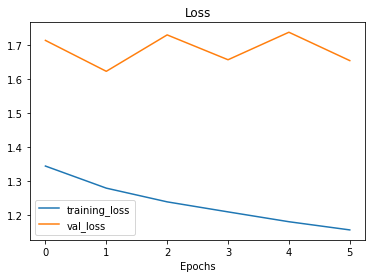

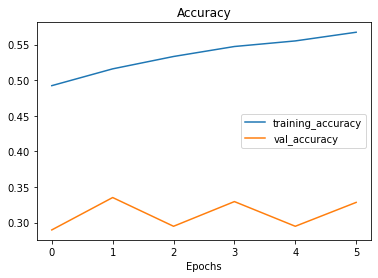

In [15]:
plot_loss_curves(history_fine_tune)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (Se  (None, 224, 224, 3)      0         
 quential)                                                       
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 2,562
Non-trainable

Found 800 files belonging to 2 classes.


25/25 [==============================] - 3s 83ms/step - loss: 0.0103 - accuracy: 0.9975


[0.010271641425788403, 0.9975000023841858]